# Heart Disease Analysis - Final Results

- Nathan Garrity (8767594)
- Jun He
- Mohamed Benkhial 
- Haoyang Li

Our use case for our dataset is to determine **Risk of Heart Disease Prediction**. We can use predictive modeling techniques to assess which variables are the most significant predictors of heart disease and extract patterns from the data. The heart disease dataset is a numerical dataset with 13 key attributes, including age, Systolic blood pressure, Cholesterol, and Gender, used primarily to predict the presence of heart disease. The **Null Hypothesis** is that patient features have no relationship with heart disease. Whereas the **Alternative Hypothesis** is that patient features significantly influences heart disease. 

Our dataset can be used to predict heart disease risk by analyzing factors like age, sex, cholesterol levels, chest pain types, and exercise-induced symptoms. A machine learning model can help identify high-risk individuals based on these symtoms, aiding early diagnosis and personalized treatment plans.

There are 3 types of input features:

- Objective: factual information;
- Examination: results of medical examination;
- Subjective: information given by the patient.

#### Data Columns (Source: [Cardiovascular Disease dataset](https://www.kaggle.com/datasets/sulianova/cardiovascular-disease-dataset?)) (Source: [Heart Disease Mortality per 100,000 individuals dataset](https://ourworldindata.org/grapher/death-rate-from-cardiovascular-disease-age-standardized-ghe)):

### Hypothesis Testing

- **Null Hypothesis**: Selected features have no relationship with heart disease.
- **Alternative Hypothesis**: Selected features significantly influences heart disease.


In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class HeartDiseaseAnalysis:
    def __init__(self, file_path):
        self.file_path = file_path
        self.df = None
        self.df_filtered = None

    def load_data(self):
        """Load data from the provided CSV file path."""
        self.df = pd.read_csv(self.file_path)
        print(f"Data loaded successfully with {self.df.shape[0]} rows and {self.df.shape[1]} columns.")
        return self.df

    def fill_missing_values_by_group(self, df, group_col, categorical_cols, numerical_cols):

        # Fill missing values in numerical columns with the mean, grouped by group_col
        df[numerical_cols] = df.groupby(group_col)[numerical_cols].transform(lambda x: x.fillna(x.mean()))

        # Fill missing values in categorical columns with the mode, grouped by group_col
        for col in categorical_cols:
            df[col] = df.groupby(group_col)[col].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else None))

        # Verify if there are any remaining missing values
        print("\nRemaining missing values:")
        print(df.isnull().sum())

In [94]:
# Using functions in HeartDiseaseAnalysis class
analysis = HeartDiseaseAnalysis('data/patient_data.csv')
df = analysis.load_data() 

Data loaded successfully with 70000 rows and 13 columns.


In [95]:
df.shape

(70000, 13)

In [96]:
df.head(10)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62,110,80,1,1,0,0,1,0
1,1,20228,1,156,85,140,90,3,1,0,0,1,1
2,2,18857,1,165,64,130,70,3,1,0,0,0,1
3,3,17623,2,169,82,150,100,1,1,0,0,1,1
4,4,17474,1,156,56,100,60,1,1,0,0,0,0
5,8,21914,1,151,67,120,80,2,2,0,0,0,0
6,9,22113,1,157,93,130,80,3,1,0,0,1,0
7,12,22584,2,178,95,130,90,3,3,0,0,1,1
8,13,17668,1,158,71,110,70,1,1,0,0,1,0
9,14,19834,1,164,68,110,60,1,1,0,0,0,0


## Data Preparation
### Handling Missing Values

In [97]:
# Identify missing values in each column
missing_values = analysis.df.isnull().sum()
print('Missing values in each column:')
missing_values

Missing values in each column:


id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [98]:
missing_value_ratio = analysis.df.isnull().mean()

print("Missing Value Ratio for each column:")
print(missing_value_ratio)

threshold = 0.4

columns_to_drop = missing_value_ratio[missing_value_ratio > threshold].index
df_dropped = analysis.df.drop(columns=columns_to_drop)
analysis.df = df_dropped

print("Columns dropped due to high missing value ratio:")
print(columns_to_drop)

print("\nDataFrame after handling missing values:")
df_dropped.head()

Missing Value Ratio for each column:
id             0.0
age            0.0
gender         0.0
height         0.0
weight         0.0
ap_hi          0.0
ap_lo          0.0
cholesterol    0.0
gluc           0.0
smoke          0.0
alco           0.0
active         0.0
cardio         0.0
dtype: float64
Columns dropped due to high missing value ratio:
Index([], dtype='object')

DataFrame after handling missing values:


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62,110,80,1,1,0,0,1,0
1,1,20228,1,156,85,140,90,3,1,0,0,1,1
2,2,18857,1,165,64,130,70,3,1,0,0,0,1
3,3,17623,2,169,82,150,100,1,1,0,0,1,1
4,4,17474,1,156,56,100,60,1,1,0,0,0,0


In [99]:
# Import necessary libraries
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Set visual style
sns.set(style="whitegrid")


In [100]:
df.head(10)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62,110,80,1,1,0,0,1,0
1,1,20228,1,156,85,140,90,3,1,0,0,1,1
2,2,18857,1,165,64,130,70,3,1,0,0,0,1
3,3,17623,2,169,82,150,100,1,1,0,0,1,1
4,4,17474,1,156,56,100,60,1,1,0,0,0,0
5,8,21914,1,151,67,120,80,2,2,0,0,0,0
6,9,22113,1,157,93,130,80,3,1,0,0,1,0
7,12,22584,2,178,95,130,90,3,3,0,0,1,1
8,13,17668,1,158,71,110,70,1,1,0,0,1,0
9,14,19834,1,164,68,110,60,1,1,0,0,0,0


Age-standardized death rate adjusts mortality rates for differences in age structure between populations, providing a more accurate comparison of mortality rates when populations have different age distributions. 

### Preprocessing / Data Wrangling

In [101]:
# Converts age from days to years
df["age"] = (df["age"] / 365).astype(int)

# Maps gender values: 1 -> Male, 2 -> Female
df["gender"] = df["gender"].map({1: "Female", 2: "Male"})

# Checks for outliers in height, weight, and blood pressure
height_range = (120, 220)
weight_range = (30, 200) 
bp_range = (50, 250) 

# Filters out extreme values
df = df[(df["height"].between(*height_range)) &
        (df["weight"].between(*weight_range)) &
        (df["ap_hi"].between(*bp_range)) &
        (df["ap_lo"].between(*bp_range))]

# Ensures cholesterol and glucose are categorical (1, 2, 3)
df["cholesterol"] = df["cholesterol"].astype("category")
df["gluc"] = df["gluc"].astype("category")

df["active"] = df["active"].map({0: 1, 1: 0})
df["smoke"] = df["smoke"].map({0: 1, 1: 0})
df["alco"] = df["alco"].map({0: 1, 1: 0})

# Reset the 'id' column to count from 1 to the number of rows
df['id'] = range(1, len(df) + 1)

# Confirms changes
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
Index: 68699 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   id           68699 non-null  int64   
 1   age          68699 non-null  int64   
 2   gender       68699 non-null  object  
 3   height       68699 non-null  int64   
 4   weight       68699 non-null  int64   
 5   ap_hi        68699 non-null  int64   
 6   ap_lo        68699 non-null  int64   
 7   cholesterol  68699 non-null  category
 8   gluc         68699 non-null  category
 9   smoke        68699 non-null  int64   
 10  alco         68699 non-null  int64   
 11  active       68699 non-null  int64   
 12  cardio       68699 non-null  int64   
dtypes: category(2), int64(10), object(1)
memory usage: 6.4+ MB


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,1,50,Male,168,62,110,80,1,1,1,1,0,0
1,2,55,Female,156,85,140,90,3,1,1,1,0,1
2,3,51,Female,165,64,130,70,3,1,1,1,1,1
3,4,48,Male,169,82,150,100,1,1,1,1,0,1
4,5,47,Female,156,56,100,60,1,1,1,1,1,0


In [102]:
file_path = "data/world_mortality_rate.csv"
df2 = pd.read_csv(file_path)

df2.head(), df2.columns

(        Entity Code  Year  \
 0  Afghanistan  AFG  2000   
 1  Afghanistan  AFG  2001   
 2  Afghanistan  AFG  2002   
 3  Afghanistan  AFG  2003   
 4  Afghanistan  AFG  2004   
 
    Age-standardized death rate from cardiovascular diseases among both sexes  
 0                                          696.05510                          
 1                                          702.28590                          
 2                                          692.65076                          
 3                                          681.37740                          
 4                                          675.17290                          ,
 Index(['Entity', 'Code', 'Year',
        'Age-standardized death rate from cardiovascular diseases among both sexes'],
       dtype='object'))

## EDA

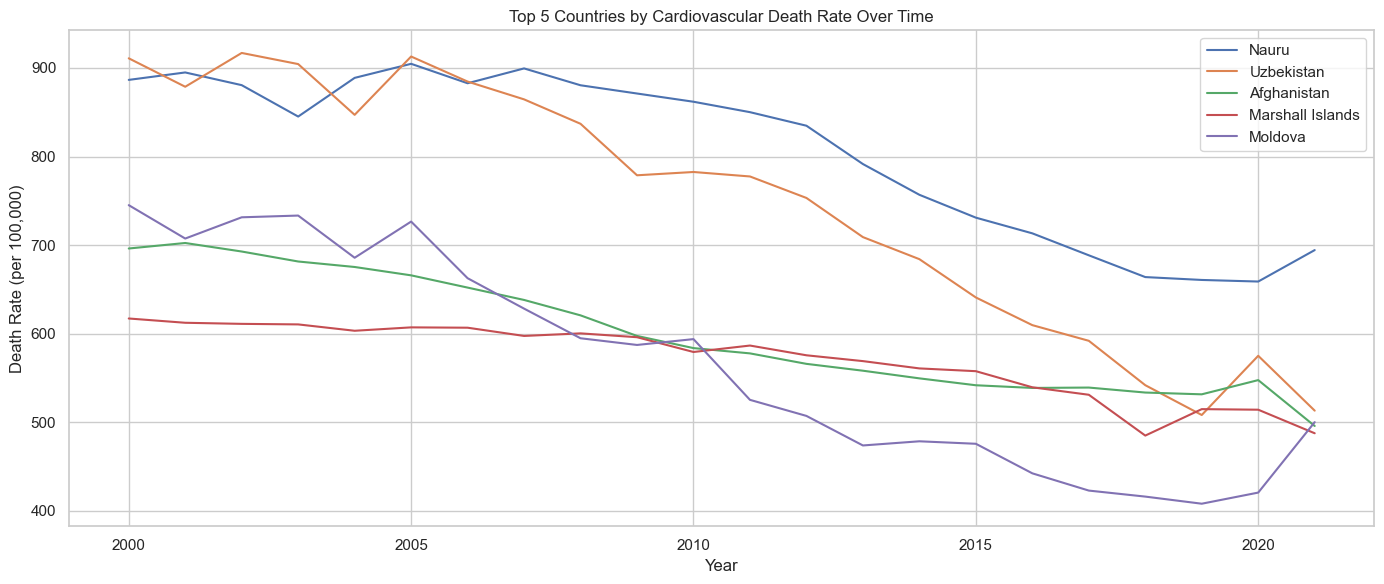

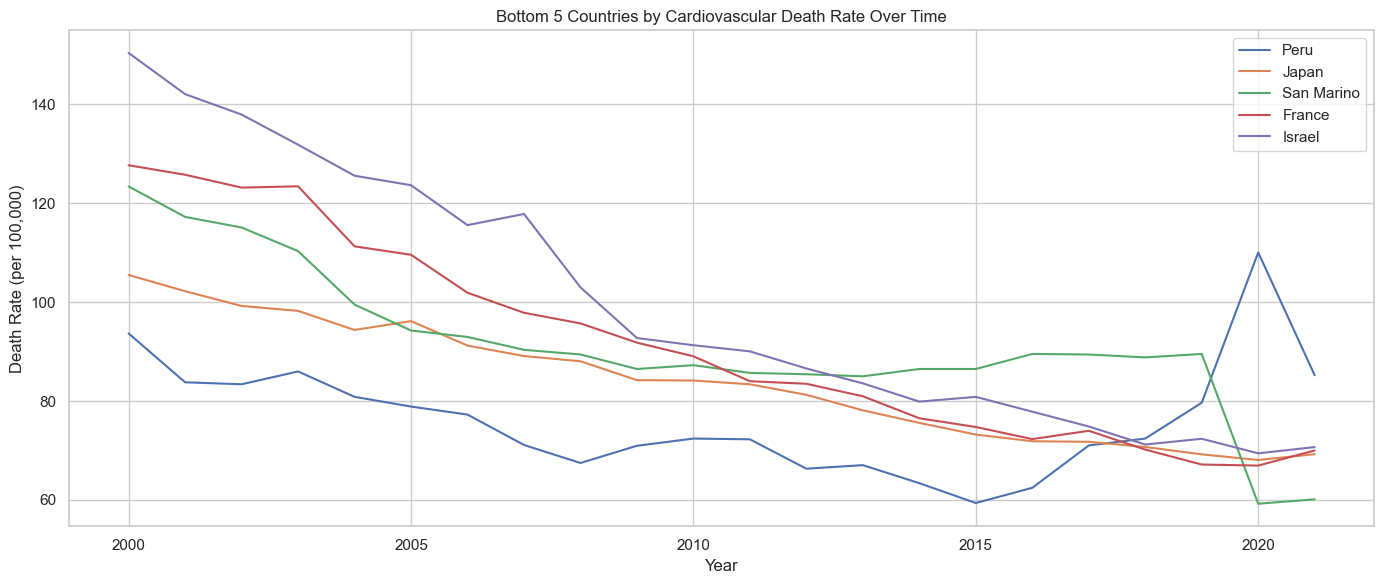

In [ ]:
df2.columns = ['Entity', 'Code', 'Year', 'Death_Rate']

df2['Death_Rate'] = pd.to_numeric(df2['Death_Rate'], errors='coerce')

avg_death_rate_by_country = df2.groupby('Entity')['Death_Rate'].mean()

top_5_countries = avg_death_rate_by_country.sort_values(ascending=False).head(5).index
bottom_5_countries = avg_death_rate_by_country.sort_values(ascending=True).head(5).index

top_5_data = df2[df2['Entity'].isin(top_5_countries)]
bottom_5_data = df2[df2['Entity'].isin(bottom_5_countries)]

plt.figure(figsize=(14, 6))
for country in top_5_countries:
    country_data = top_5_data[top_5_data['Entity'] == country]
    plt.plot(country_data['Year'], country_data['Death_Rate'], label=country)
plt.title('Top 5 Countries by Cardiovascular Death Rate Over Time')
plt.xlabel('Year')
plt.ylabel('Death Rate (per 100,000)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 6))
for country in bottom_5_countries:
    country_data = bottom_5_data[bottom_5_data['Entity'] == country]
    plt.plot(country_data['Year'], country_data['Death_Rate'], label=country)
plt.title('Bottom 5 Countries by Cardiovascular Death Rate Over Time')
plt.xlabel('Year')
plt.ylabel('Death Rate (per 100,000)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


#### Objective Features

Ivestigating the objective features shows that 

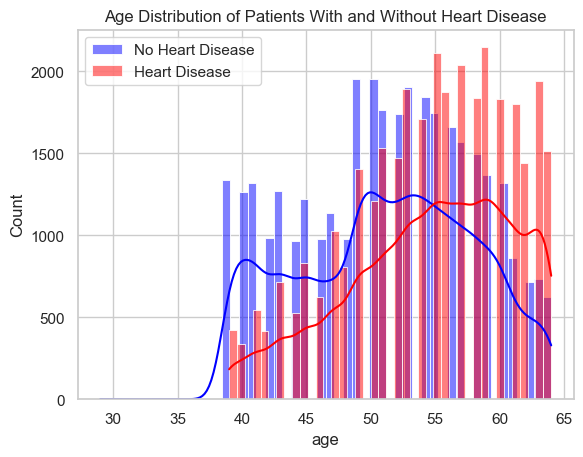

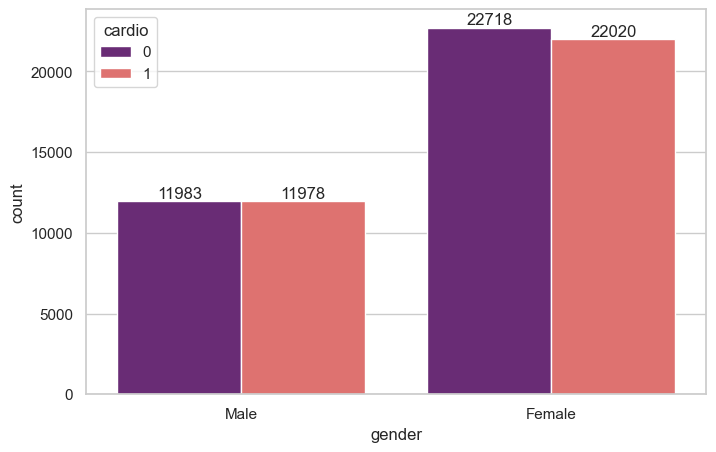

In [ ]:
sns.histplot(df[df["cardio"] == 0]["age"], color="blue", label="No Heart Disease", kde=True, alpha=0.5)
sns.histplot(df[df["cardio"] == 1]["age"], color="red", label="Heart Disease", kde=True, alpha=0.5)
plt.legend()
plt.title("Age Distribution of Patients With and Without Heart Disease")
plt.show()

plt.figure(figsize=(8,5))
ax = sns.countplot(data = df,x='gender',hue='cardio',palette = 'magma')
for x in ax.containers:
    ax.bar_label(x)

plt.show()



#### Examination Features

C:\Users\natha\AppData\Local\Temp\ipykernel_22860\1817226425.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  bx.set_xticklabels(['low', 'medium', 'high'])


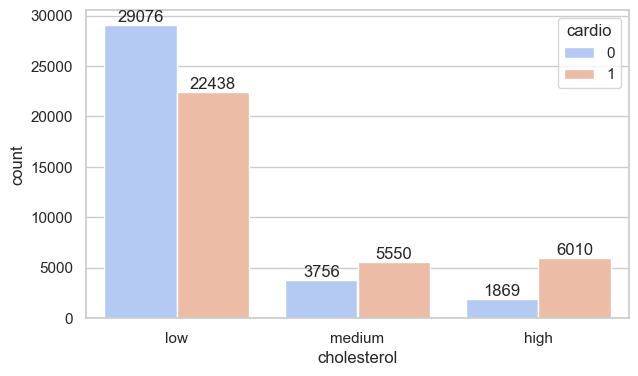

C:\Users\natha\AppData\Local\Temp\ipykernel_22860\1817226425.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cx.set_xticklabels(['low', 'medium', 'high'])


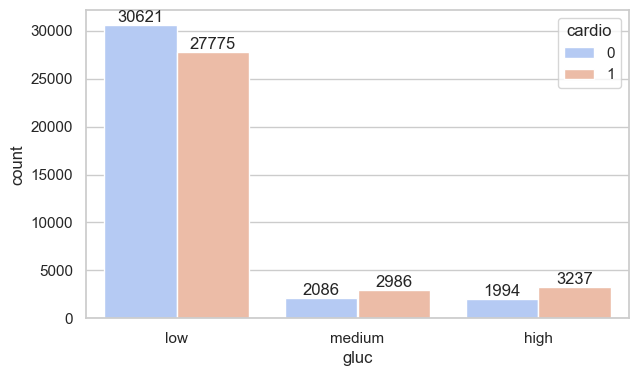

In [ ]:
plt.figure(figsize=(7,4))
bx = sns.countplot(x='cholesterol',hue='cardio',data = df,palette = 'coolwarm')
bx.set_xticklabels(['low', 'medium', 'high'])
for p in bx.containers:
    bx.bar_label(p)
plt.show()

plt.figure(figsize=(7,4))
cx = sns.countplot(x='gluc',hue='cardio',data = df,palette = 'coolwarm')
cx.set_xticklabels(['low', 'medium', 'high'])
for b in cx.containers:
    cx.bar_label(b)
plt.show()

#### Subjective Features

C:\Users\natha\AppData\Local\Temp\ipykernel_22860\1535856687.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  dx.set_xticklabels(['no', 'yes'])


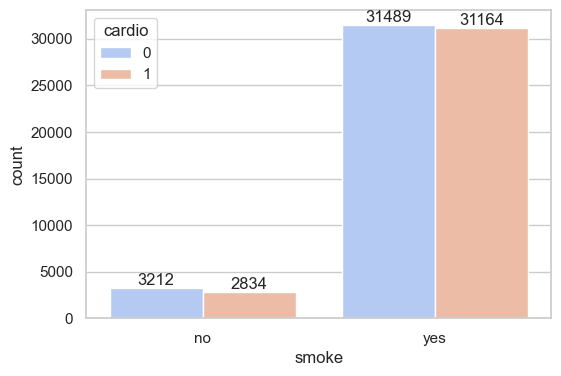

C:\Users\natha\AppData\Local\Temp\ipykernel_22860\1535856687.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ex.set_xticklabels(['no', 'yes'])


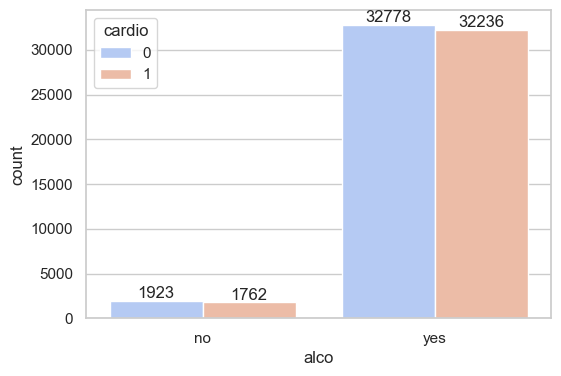

C:\Users\natha\AppData\Local\Temp\ipykernel_22860\1535856687.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  fx.set_xticklabels(['no', 'yes'])


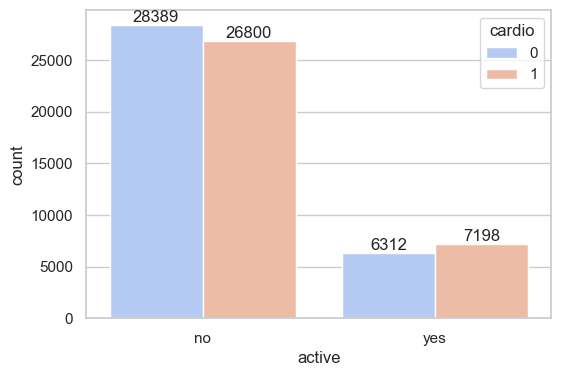

In [ ]:
plt.figure(figsize=(6,4))
dx = sns.countplot(x='smoke', hue='cardio', data=df, palette='coolwarm')
dx.set_xticklabels(['no', 'yes'])
for b in dx.containers:
    dx.bar_label(b)
plt.show()

plt.figure(figsize=(6,4))
ex = sns.countplot(x='alco', hue='cardio', data=df, palette='coolwarm')
ex.set_xticklabels(['no', 'yes'])
for b in ex.containers:
    ex.bar_label(b)
plt.show()

plt.figure(figsize=(6,4))
fx = sns.countplot(x='active', hue='cardio', data=df, palette='coolwarm')
fx.set_xticklabels(['no', 'yes'])
for b in fx.containers:
    fx.bar_label(b)
plt.show()

#### Chi-Squared Test (A/B Test)
Using a chi-squared test Helps us determine whether there is an association between cholesterol and whether a patient is male or female. This can help understand if certain cholesterol are more prevalent in one gender.

Group A: Female

Group B: Male

In [ ]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df['gender'], df['cholesterol'])

# Performs the Chi-Squared test on the two columns
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-squared statistic (χ²): {chi2_stat}")
print(f"P-Value: {p_val}")
print(f"Degrees of Freedom: {dof}")
print(f"Expected frequencies: \n{expected}")
print(f"Observed frequencies: \n{contingency_table}")

# Hypothesis testing
alpha = 0.05
if p_val < alpha:
    print("Reject the null hypothesis. gender and cholesterol are not independent (there is an association between them)")
else:
    print("Fail to reject the null hypothesis. gender and cholesterol are independent (there is no association between them)")

Chi-squared statistic (χ²): 93.12687636239735
P-Value: 5.994538302044329e-21
Degrees of Freedom: 2
Expected frequencies: 
[[33546.82501929  6060.23126974  5130.94371097]
 [17967.17498071  3245.76873026  2748.05628903]]
Observed frequencies: 
cholesterol      1     2     3
gender                        
Female       33042  6257  5439
Male         18472  3049  2440
Reject the null hypothesis. gender and cholesterol are not independent (there is an association between them)


We can determine that from this A/B test that there is an accociation between gender and cholesterol levels. The distribution of cholesterol levels is not the same for males and females.

In [ ]:
# Map gender values: 1 -> Male, 2 -> Female
df["gender"] = df["gender"].map({"Female": 1, "Male": 2})

### Cause and Effect (Why Heart Disease Happens) using Correlation Matrix 

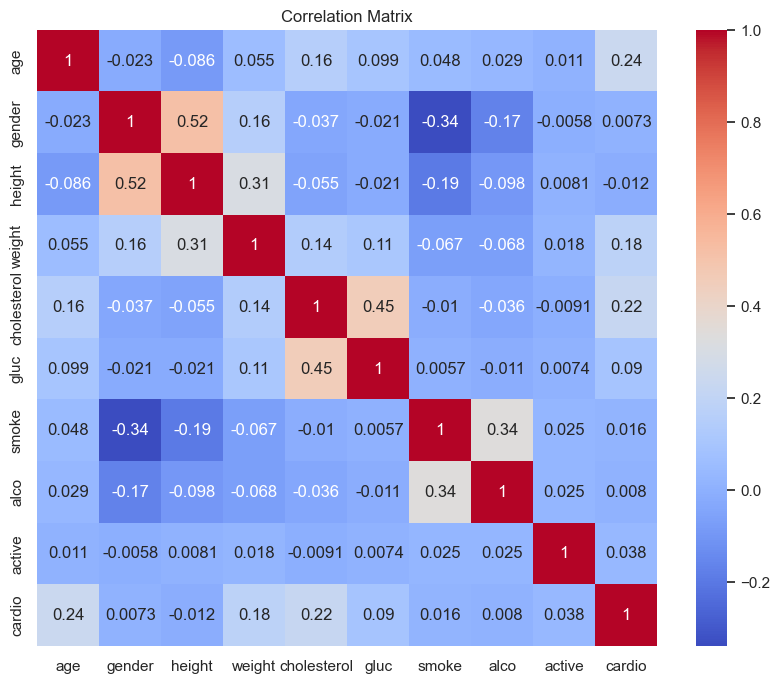

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Pearson's correlation
correlation_matrix = df[['age', 'gender', 'height', 'weight', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio']].corr()

# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

The correlation heatmap shows that age, cholesterol, and weight have the strongest positive relationships with heart disease, with age showing the highest correlation (0.24). This highlights how cardiovascular risk increases over time and how key risk factors like high cholesterol and obesity contribute significantly yet are often preventable with early action. 

Glucose shows a weaker correlation (0.09), suggesting it plays a role but is often overlooked until later stages. Lifestyle factors like smoking, alcohol, and physical inactivity show very low correlations, likely due to self-reporting limitations or short-term data, even though they are medically recognized as contributors. 

These findings above using the correlation heatmap support the idea that heart disease risk is detectable well before diagnosis based on the factors that contribute to it, but are often missed due to lack of awareness, limited monitoring, or absence of proactive systems. This reinforces the need for AI-driven early detection to flag patients at risk and enable earlier interventions.  

## Logistic Classification

For our logistic regression model, 0 represents a paient does not have heart disease, while 1 means a patient does have heart disease.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

selected_features = ['age', 'gender', 'weight', 'cholesterol', 'ap_hi', 'ap_lo', 'smoke', 'alco', 'active']
X = df[selected_features]
y = df['cardio']

X = sm.add_constant(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit logistic regression model
log_model = sm.Logit(y_train, X_train).fit()

y_pred = log_model.predict(X_test)
y_pred_class = (y_pred >= 0.5).astype(int)

print("Accuracy:", accuracy_score(y_test, y_pred_class))

Optimization terminated successfully.
         Current function value: 0.560420
         Iterations 6
Accuracy: 0.7270257156720039


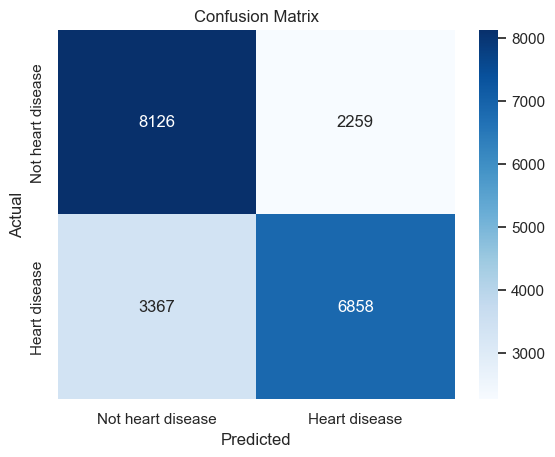

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred_class)

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not heart disease', 'Heart disease'], yticklabels=['Not heart disease', 'Heart disease'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#### Components of the Confusion Matrix

**Cell Values:**

- 7952 (True Negatives): The model correctly predicted "Not Heart Disease" for 7952 instances.
- 7194 (True Positives): The model correctly predicted "Heart Disease" for 7194 instances.
- 2509 (False Positives): The model incorrectly predicted "Heart Disease" for instances that are actually "Not Heart Disease."
- 3345 (False Negatives): The model incorrectly predicted "Not Heart Disease" for instances that are actually "Heart Disease."

In [ ]:
print("\nClassification Report:\n", classification_report(y_test, y_pred_class))


Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.78      0.74     10385
           1       0.75      0.67      0.71     10225

    accuracy                           0.73     20610
   macro avg       0.73      0.73      0.73     20610
weighted avg       0.73      0.73      0.73     20610



#### **Overall Metrics**

Accuracy: The ratio of correctly predicted observations to the total observations.

- Value: 0.72
- Interpretation: The model correctly predicts 72% of the instances in the dataset.

In [ ]:
print(log_model.summary())

                           Logit Regression Results                           
Dep. Variable:                 cardio   No. Observations:                48089
Model:                          Logit   Df Residuals:                    48079
Method:                           MLE   Df Model:                            9
Date:                Tue, 15 Apr 2025   Pseudo R-squ.:                  0.1914
Time:                        15:46:26   Log-Likelihood:                -26950.
converged:                       True   LL-Null:                       -33330.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const         -12.5724      0.161    -78.227      0.000     -12.887     -12.257
age             0.0514      0.002     31.847      0.000       0.048       0.055
gender         -0.0547      0.023     -2.327    

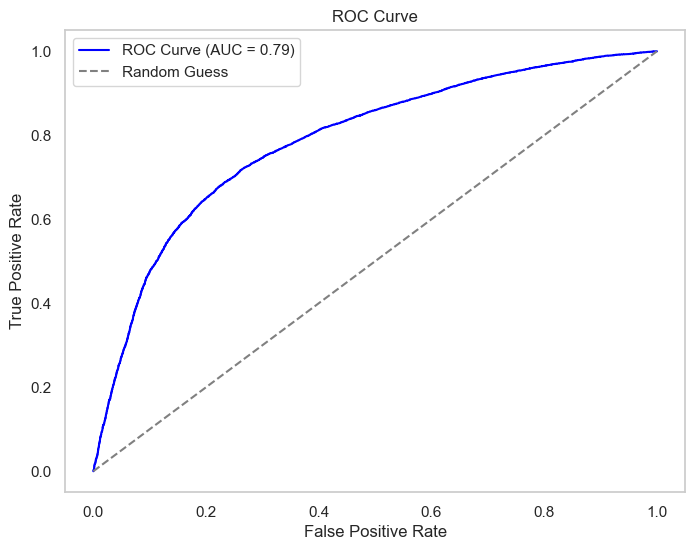

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

X_test_selected = sm.add_constant(X_test[selected_features])
y_pred_prob = log_model.predict(X_test_selected)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
auc_score = roc_auc_score(y_test, y_pred_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc_score:.2f})", color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label="Random Guess")
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid()
plt.show()

In [ ]:
y_prob_positive = log_model.predict(X_test)

y_prob_negative = 1 - y_prob_positive

import numpy as np
y_prob = np.column_stack((y_prob_negative, y_prob_positive))
 
print("Predicted probabilities for the first 5 patients (Negative and Positive classes):")
print(y_prob[:5])

Predicted probabilities for the first 5 patients (Negative and Positive classes):
[[0.663319   0.336681  ]
 [0.52195219 0.47804781]
 [0.30829093 0.69170907]
 [0.17987692 0.82012308]
 [0.71860356 0.28139644]]


In [ ]:
y_pred_probs = log_model.predict(X_test)

X_test['Predicted Probability'] = y_pred_probs
X_test.head()

,const,age,gender,weight,cholesterol,ap_hi,ap_lo,smoke,alco,active,Predicted Probability
39756,1.0,52,2,68,1,120,80,1,1,0,0.336681
35376,1.0,62,2,76,1,120,80,1,1,0,0.478048
31606,1.0,61,2,100,1,130,90,1,1,0,0.691709
8959,1.0,54,1,96,1,150,90,1,1,0,0.820123
48945,1.0,47,1,62,1,120,80,1,1,0,0.281396


In [ ]:
X_test['Risk Level'] = pd.cut(
    y_pred_probs,
    bins=[0, 0.3, 0.7, 1],
    labels=['Low', 'Medium', 'High']
)

X_test.head()


,const,age,gender,weight,cholesterol,ap_hi,ap_lo,smoke,alco,active,Predicted Probability,Risk Level
39756,1.0,52,2,68,1,120,80,1,1,0,0.336681,Medium
35376,1.0,62,2,76,1,120,80,1,1,0,0.478048,Medium
31606,1.0,61,2,100,1,130,90,1,1,0,0.691709,Medium
8959,1.0,54,1,96,1,150,90,1,1,0,0.820123,High
48945,1.0,47,1,62,1,120,80,1,1,0,0.281396,Low


In [ ]:
X_test['ID'] = range(1, len(X_test) + 1)

X_test.shape
X_test.head()

,const,age,gender,weight,cholesterol,ap_hi,ap_lo,smoke,alco,active,Predicted Probability,Risk Level,ID
39756,1.0,52,2,68,1,120,80,1,1,0,0.336681,Medium,1
35376,1.0,62,2,76,1,120,80,1,1,0,0.478048,Medium,2
31606,1.0,61,2,100,1,130,90,1,1,0,0.691709,Medium,3
8959,1.0,54,1,96,1,150,90,1,1,0,0.820123,High,4
48945,1.0,47,1,62,1,120,80,1,1,0,0.281396,Low,5


### Generated User Stories

In [ ]:
import os

# Replace with your Gemini API key
os.environ["GOOGLE_API_KEY"] = "paste_the_api_key_here"

In [ ]:
import os
import pandas as pd
import google.generativeai as genai

def setup_llm(api_key):
    """Sets up the Google Generative AI model with the provided API key."""
    genai.configure(api_key=api_key)
    model = genai.GenerativeModel('gemini-1.5-flash-latest')
    return model

def generate_prompt(model, prompt_text):
    """Generates a response from the LLM based on the given prompt."""
    try:
        response = model.generate_content(prompt_text)
        return response.text
    except Exception as e:
        return f"Error generating prompt: {e}"

def generate_and_print(prompt):
    """Generates a response and prints it."""
    if model:
        result = generate_prompt(model, prompt)
        print(result)
        return result
    else:
        print("LLM not initialized. Please set your API key.")
        return None

# Prompt the user for a patient ID
patient_id = input("Enter the patient ID (0-20,610): ")

# Check if the patient exists
if patient_id in X_test['ID'].astype(str).values:
    patient_data = X_test[X_test['ID'].astype(str) == patient_id].iloc[0]

    # Map cholesterol and gender for better readability
    cholesterol_status = {1: "normal", 2: "slightly high", 3: "high"}
    gender = "female" if patient_data['gender'] == 1 else "female"


    # Builds a dynamic prompt based on patient data in our dataset
    prompt_text = f"""Write a short 100-150 word user story of a patient with the following attributes to raise awareness about heart disease, the goal is to have the patient go and get screened for further analysis and this must be a "gain-framed" user story (age provided can be refernced as a range and so can blood pressure). 
Make it emotionally engaging rather than statistical:
- Age: {patient_data['age']}
- Gender: {'Female' if patient_data['gender'] == 1 else 'male'}
- Cholesterol (): {cholesterol_status.get(patient_data['cholesterol'], 'unknown')}
- Smoker: {'yes' if patient_data['smoke'] == 1 else 'no'}
- Alcohol consumption: {'yes' if patient_data['alco'] == 1 else 'no'}
- Physically active: {'yes' if patient_data['active'] == 1 else 'no'}
- Blood Pressure: {patient_data.get('ap_hi', 'N/A')}/{patient_data.get('ap_lo', 'N/A')}
"""

    api_key = os.getenv("GOOGLE_API_KEY")
    if api_key:
        patient_summary = pd.DataFrame([{
            "Patient ID": patient_data['ID'],
            "Age": patient_data['age'],
            "Gender": "Female" if patient_data['gender'] == 1 else "Male",
            "Cholesterol": cholesterol_status.get(patient_data['cholesterol'], "unknown"),
            "Smoker": "Yes" if patient_data['smoke'] == 1 else "No",
            "Alcohol Consumption": "Yes" if patient_data['alco'] == 1 else "No",
            "Physically Active": "Yes" if patient_data['active'] == 1 else "No",
            "Blood Pressure (Systolic/Diastolic)": f"{patient_data['ap_hi']}/{patient_data['ap_lo']}"
        }])

        print("\nPatient Summary:\n")
        print(patient_summary)
        print("\n\n")
        model = setup_llm(api_key)
        result = generate_and_print(prompt_text)
    else:
        print("Please set your Google API key as an environment variable (GOOGLE_API_KEY).")
else:
    print("Patient ID not found in dataset.")


Patient Summary:

   Patient ID  Age  Gender Cholesterol Smoker Alcohol Consumption  \
0           4   54  Female      normal    Yes                 Yes   

  Physically Active Blood Pressure (Systolic/Diastolic)  
0                No                              150/90  



Sarah, a vibrant 50-something woman, loved her life – her family, her friends, her laughter.  But lately, a nagging worry had begun to creep in.  She'd been feeling unusually tired, and her blood pressure readings, consistently high (around 150/90), were a cause for concern.  Despite her normal cholesterol levels, the years of smoking and occasional drinking, coupled with her sedentary lifestyle, weighed on her mind.  She pictured herself in the future, sharing precious moments with loved ones, vibrant and healthy, and the thought fueled a powerful desire to protect that future.  Sarah decided that proactive care was the answer. She’d schedule a heart health screening – a small step today for a lifetime of joyful 

In [ ]:
def translate_text(model, text, target_language):
    translation_prompt = f"Translate the following text into {target_language} (if the text isn't an real-world langauage, prompt the user to retry):\n\n{text}"
    return generate_prompt(model, translation_prompt)

# Ask the user for the target language
user_language = input("Enter the language you want to translate the text into: ")

# Perform the translation
translated_story = translate_text(model, result, user_language)

print(f"\nTranslation in {user_language}:\n", translated_story)


Translation in french:
 Sarah, une femme dynamique d'une cinquantaine d'années, aimait sa vie – sa famille, ses amis, ses rires. Mais récemment, une inquiétude persistante avait commencé à s'installer. Elle se sentait anormalement fatiguée, et ses lectures de tension artérielle, constamment élevées (autour de 150/90), étaient une source de préoccupation.  Malgré un taux de cholestérol normal, les années de tabagisme et de consommation occasionnelle d'alcool, couplées à son mode de vie sédentaire, pesaient sur son esprit. Elle s'imaginait dans le futur, partageant des moments précieux avec ses proches, vibrante et en bonne santé, et cette pensée alimentait un puissant désir de protéger cet avenir. Sarah décida qu'une prise en charge proactive était la solution. Elle allait programmer un bilan de santé cardiaque – un petit pas aujourd'hui pour une vie de lendemains joyeux. Il était temps de prendre sa santé en main et d'assurer un avenir rempli de tout ce qui comptait le plus pour elle.

### Conclusion

In conclusion, this report underscores the importance of addressing heart disease through a data-informed approach centered on early detection, awareness, and accessibility. By analyzing both the statistical and societal dimensions of cardiovascular disease, we demonstrate how AI-driven risk detection models, when combined with public awareness campaigns can significantly reduce global heart disease mortality. 

Our findings suggest that implementing these strategies could help achieve a 31% reduction in deaths by 2035, potentially saving 5.55 million lives annually as per our gap and breakdown. Personalized interventions using machine learning models can help patients to take preventive actions before symptoms appear, ultimately reducing emergency interventions, hospitalizations, and healthcare costs. Moving forward, collaboration with healthcare institutions, the integration of wearable technologies, and public trust in AI systems will be essential to achieving large-scale impact and fostering healthier global communities. 

The predicted probabilities from our risk detection model can help designate the risk level to each patient who doesn't suffer from heart disease currently, in hopes of reducing the gap of 5.55 million deaths annually. With the risk probabilities we can produce user stories on how a patient suffers from heart disease, which we can use for awareness campaigns tailored to individuals in our dataset. 